In [59]:
import pandas as pd
from pathlib import Path
import numpy as np
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [31]:
file_path = Path("Covid_FinalProject.csv")
data = pd.read_csv(file_path)
data.head()

,Country_Code,Country_Name,Continent,Population,people_fully_vaccinated,median_age,total_cases,total_deaths,life_expectancy,human_development_index,...,divorce_choice,bank_account,business_ownership,contract_signature,domestic_travel,international_travel,work_at_night,dangerous_job,industrial_job,remarry
0,ABW,Aruba,North America,106459,32884.252330,41.200000,21306.44720,142.327640,76.29,0.690681,...,0,1,1,0,1,1,1,1,1,1
1,AFG,Afghanistan,Asia,41128772,723061.459200,18.600000,122011.07150,4977.338772,64.83,0.511000,...,0,1,1,0,1,0,0,0,0,0
2,AGO,Angola,Africa,35588996,325527.213700,16.800000,56850.80497,1143.634033,61.15,0.581000,...,1,1,1,1,1,1,1,0,0,1
3,ALB,Albania,Europe,2842318,127356.554000,38.000000,175928.43510,2275.651127,78.57,0.795000,...,1,1,1,1,1,1,1,1,1,1
4,AND,Andorra,Europe,79843,1542.322455,31.888298,23705.44134,113.786325,83.73,0.868000,...,0,1,1,0,1,1,1,1,1,0


##### data.describe()

In [32]:
y = data['total_deaths']
X = data[['median_age', 'life_expectancy', 'gdp_per_capita']]
# Add a constant to the independent variables (for the intercept term in the regression)
X = sm.add_constant(X)
# Fit the multivariate regression model
model = sm.OLS(y, X).fit()
# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           total_deaths   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.783
Date:                Sun, 23 Jul 2023   Prob (F-statistic):             0.0433
Time:                        15:34:09   Log-Likelihood:                -1730.9
No. Observations:                 140   AIC:                             3470.
Df Residuals:                     136   BIC:                             3482.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.094e+04   6.84e+04     

In [ ]:
#Total Deaths

In [62]:
X = data[['Population', 'total_cases']].values
y = data['total_deaths'].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

In [64]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 6681392329.947444
R-squared: 0.10761003489600729


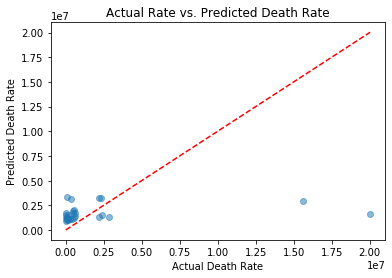

In [72]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Death Rate")
plt.ylabel("Predicted Death Rate")
plt.title("Actual Rate vs. Predicted Death Rate")
plt.show()

In [ ]:
#Death Rates of Vacinated vs. Unnvacinated 

In [44]:
data_2 = data
data_2['Percentage_Vaccinated'] = (data_2['people_fully_vaccinated']/data_2['Population'])*100
data_2['Percentage_Not_Vaccinated'] = 100 - data_2['Percentage_Vaccinated']
data_2['Percentage_Vaccinated'] = data_2['Percentage_Vaccinated'].round(2)
data_2['Percentage_Not_Vaccinated'] = data_2['Percentage_Not_Vaccinated'].round(2)
data_2.head()

,Country_Code,Country_Name,Continent,Population,people_fully_vaccinated,median_age,total_cases,total_deaths,life_expectancy,human_development_index,...,business_ownership,contract_signature,domestic_travel,international_travel,work_at_night,dangerous_job,industrial_job,remarry,Percentage_Vaccinated,Percentage_Not_Vaccinated
0,ABW,Aruba,North America,106459,32884.252330,41.200000,21306.44720,142.327640,76.29,0.690681,...,1,0,1,1,1,1,1,1,30.89,69.11
1,AFG,Afghanistan,Asia,41128772,723061.459200,18.600000,122011.07150,4977.338772,64.83,0.511000,...,1,0,1,0,0,0,0,0,1.76,98.24
2,AGO,Angola,Africa,35588996,325527.213700,16.800000,56850.80497,1143.634033,61.15,0.581000,...,1,1,1,1,1,0,0,1,0.91,99.09
3,ALB,Albania,Europe,2842318,127356.554000,38.000000,175928.43510,2275.651127,78.57,0.795000,...,1,1,1,1,1,1,1,1,4.48,95.52
4,AND,Andorra,Europe,79843,1542.322455,31.888298,23705.44134,113.786325,83.73,0.868000,...,1,0,1,1,1,1,1,0,1.93,98.07


In [45]:
X_a = data_2[['Percentage_Vaccinated']]
y_a = data_2['total_deaths']

X_b = data_2[['Percentage_Not_Vaccinated']]
y_b = data_2['total_deaths']

In [46]:
X_a = sm.add_constant(X_a)
X_b = sm.add_constant(X_b)

model_a = sm.OLS(y_a, X_a)
results_a = model_a.fit()
predictions_a = results_a.predict(X_a)

model_b = sm.OLS(y_b, X_b)
results_b = model_b.fit()
predictions_b = results_b.predict(X_b)

predictions_a *= 100
predictions_b *= 100

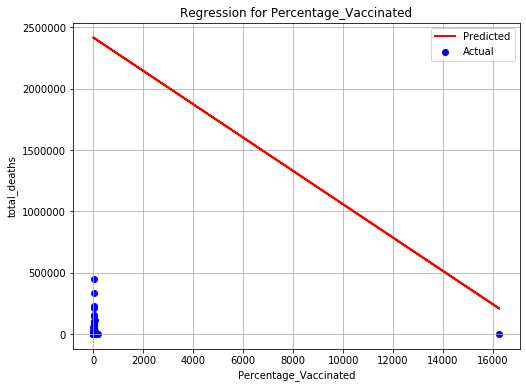

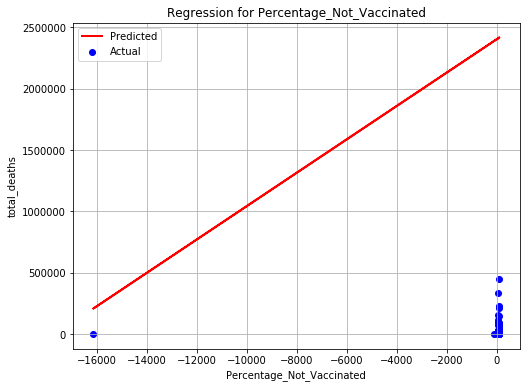

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(X_a['Percentage_Vaccinated'], y_a, color='blue', label='Actual')
plt.plot(X_a['Percentage_Vaccinated'], predictions_a, color='red', linewidth=2, label='Predicted')
plt.xlabel('Percentage_Vaccinated')
plt.ylabel('total_deaths')
plt.legend()
plt.title('Regression for Percentage_Vaccinated')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_b['Percentage_Not_Vaccinated'], y_b, color='blue', label='Actual')
plt.plot(X_b['Percentage_Not_Vaccinated'], predictions_b, color='red', linewidth=2, label='Predicted')
plt.xlabel('Percentage_Not_Vaccinated')
plt.ylabel('total_deaths')
plt.legend()
plt.title('Regression for Percentage_Not_Vaccinated')
plt.grid(True)
plt.show()



In [ ]:
#Covid Cases and GDP per Capita 

In [66]:
X = data[['gdp_per_capita']].values
y = data['total_cases'].values

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

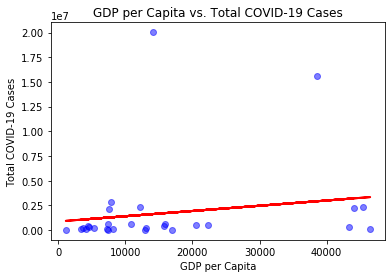

In [71]:
plt.scatter(X_test, y_test, color='blue', alpha=0.5)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('GDP per Capita')
plt.ylabel('Total COVID-19 Cases')
plt.title('GDP per Capita vs. Total COVID-19 Cases')
plt.show()
